In [9]:
from IPython.display import display
from sympy import *

# Preliminaries

To understand this notes, the reader should already knows the basics of python and has a decent mathmetical backgound about function, calculus and matrix.

# Helper function

In later notes, we will frequently compare the Sympy object with the result after a Sympy function is applied to it, calling a method of it, or after it is evaluated. To reduce code duplication, I write a helper.py to do these staff.

In [10]:
from helper import comparator_factory
func_comparator = comparator_factory('Before applying {}：','After:')

The returning comparator is a function with syntax ```comparator(target, func, *args, *kwargs)```。 ```target``` is a sympy object, ```func``` is a sympy function we want to apply, and ```args```,```kwargs``` is the additional positional arguments and keyword arguments pass to ```func```.

In [11]:
from helper import comparator_method_factory
method_comparator = comparator_method_factory('Before calling {}：','After:')

The returning comparator is a function with syntax ```comparator(target, method_name, *args, *kwargs)```。 ```target``` is a sympy object, ```method_name``` is a method name we want to call on the object, and ```args```,```kwargs``` is the additional positional arguments and keyword arguments pass to the method.

In [12]:
from helper import comparator_eval_factory

eval_comparator = comparator_eval_factory('Before evaluation：','After:')

```comparator``` returned by ```comparator_eval_factory``` has the syntax of ```comparator(uneval)```。 ```uneval``` is the unevaluated Sympy object.

# What is symbolic computation?
Sympy deals with mathmetical computation symbolicly and mathmethical expressions with unevaluated variables are left in their symbolic form. Let's take an example.

First, we import python built-in functions to compute square root.We might do something like this

In [13]:
from math import sqrt
sqrt(8)

That is not an accurate represetation of $\sqrt{8}$ and we would have a hard time deducing it from the long float to origin expression. This is symbolic computation comes in. With symbolic computaion system like Sympy, squared roots of numbers that are not perfect square are left unevaluated by default.

In [14]:
from sympy import sqrt
sqrt(8)

# Setting up Pretty Printing

In example above the result is great but the printing in jupyter doesn't looks great. To get a prettier printing, call sympy.init_printing()

In [15]:
from sympy import init_printing
init_printing()

In [16]:
sqrt(8)

Looks great now!!

# Symbolic computation with variables

Sympy is capable of manipulating expressions with symbolic variables. Here is an example.

In [17]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr

Obvious simplications are automatically applied by Sympy so in the example below we get $y$ insted of $x+2y-x-y$

In [18]:
expr-x-y

That's what we cannot realize without the help from a symbolic computation system like Sympy since in common situations a programming language cannot manipulate a variable before assigning a concret value to it.

# Power of Sympy

Here is a small sampling of the sort of symbolic power Sympy is capable of, to whet you appetite. We create several symbol variables first.

In [19]:
x, t, z, nu = symbols('x t z nu')

## derivative

Take the derivative of $\sin{(x)}e^x$

Before evaluation：


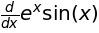

After:


In [20]:
s = Derivative(sin(x)*exp(x),x)

eval_comparator(s)

## integral

Compute $\int(e^x\sin{(x)} + e^x\cos{(x)})\,dx$

Before evaluation：


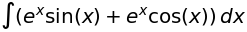

After:


In [21]:
s = Integral(exp(x)*sin(x) + exp(x)*cos(x))

eval_comparator(s)

Compute $\int_{-\infty}^\infty \sin{(x^2)}\,dx$

Before evaluation：


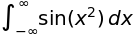

After:


In [22]:
s = Integral(sin(x**2),(x,-oo,oo))

eval_comparator(s)

Compute $\lim_{x\to 0}\frac{\sin{(x)}}{x}$

## Limit

Before evaluation：


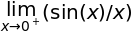

After:


In [23]:
s = Limit(sin(x)/x, x, 0)

eval_comparator(s)

Solve $x^2 - 2 = 0$

## Solve equation

In [25]:
s = Eq(x**2 - 2, 0)

func_comparator(s, solve, x)

Before applying solve()：


After:


## Solve differential equation

Solve differential equation $y'' - y = e^t$

Before applying dsolve()：


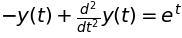

After:


In [27]:
y = Function('y')

s = Eq(y(t).diff(t, t) - y(t), exp(t))

func_comparator(s, dsolve, y(t))

## Matrix computation

Find the eigenvalue of $\left[\begin{smallmatrix}1 & 2\\2 &
2\end{smallmatrix}\right]$

In [28]:
Matrix([[1, 2], [2, 2]]).eigenvals()

## Plotting

Plot functions

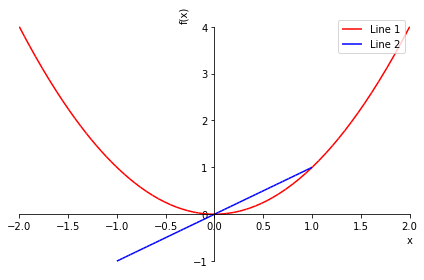

In [30]:
expr_1 = x**2
range_1 = (x,-2,2)

expr_2 = x
range_2 = (x,-1,1)

p = plot(
    (expr_1,range_1),
    (expr_2,range_2),
    show = False,
    legend = True
);

p[0].line_color = 'r'
p[1].line_color = 'b'

p[0].label = 'Line 1'
p[1].label = 'Line 2'

p.show()

plot 3d surface

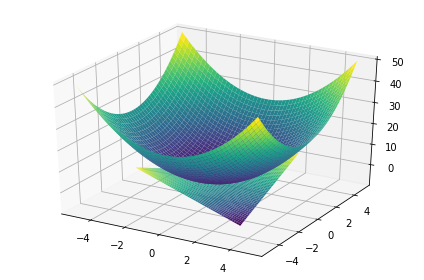

In [31]:
from sympy.plotting import plot3d

x,y = symbols('x y')

plot3d(
    (x**2 + y**2, (x, -5, 5), (y, -5, 5)),
    (x*y, (x, -3, 3), (y, -3, 3))
);

## Define Symbols

## Define variable symbols

Use symbols() to define multiple variables at one. The desired symbols are pass in as string, each symbol seperated by blank.

In [32]:
from sympy import symbols

In [33]:
x,y,z = symbols('x y z')
display(x,y,z)

You can use words instead of characters as symbol names.

In [34]:
speed,time = symbols('speed time')
display(speed,time)

Some strings are reserved for special symbols such as $\lambda, \nu$

In [35]:
lamda, n = symbols('lamda nu')
display(lamda, n)

Python variable names don't have to keep the same with the symbol names.

In [36]:
y, x = symbols('x y')
display(x, y)

But to avoid uncessary confusion, keeping python variables the same with symbol names is recommended.

## Define function symbols

Pass ```cls = Function``` to define function symbol variales.

In [37]:
f, g = symbols('f g', cls=Function)

display(f(x))

display(g(x,y))

## Define numbers

Use Integer, Float, Rational to define integer, float and rational numbers in Sympy.

In [38]:
from sympy import Integer, Float, Rational

In [39]:
i = Integer(1)

i

In [40]:
f = Float(2.31)

f

In [41]:
r = Rational(2,7)

r

# Define expressions
## Basic expressions

Just use symbol variables and python operators to construct basic mathmetical expression.

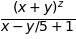

In [42]:
x,y,z = symbols('x y z')

expr = (x+y)**z/(x+1-y/5)

expr

When python objects are combined with sympy objects, python objects are converted automatically into Sympy objects. So in most situations wen can use build-in python numbers. 

However, Python apply the division of two python numbers first and convert the rational number into a float.

In [43]:
expr = x+1/2

expr

So when rational number is needed, define the rational number explicitly.

In [44]:
expr = x+Rational(1,2)

expr

More complex expressions like calculuas are constructed with the help of Sympy functions which will be covered in later notes.

## Define Equation
Use ```Eq``` to define an equation.

In [45]:
x,y = symbols('x,y')

eq = Eq(x**2-x,0)

print('等式n:')
display(eq)

等式n:


# Expression Manipulation

## Polynomial/Rational Function

### simplify()
Sympy has dozens of function to perform various kinds of expression simplification. simplify() is a general function which attempts to apply all these functions in an intelligent way to arrive at the simplest form of the expression.

Here are some examples.

In [46]:
expr = sin(x)**2 + cos(x)**2
func_comparator(expr, simplify)

Before applying simplify()：


After:


Before applying simplify()：


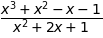

After:


In [47]:
expr = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)

func_comparator(expr, simplify)

Before applying simplify()：


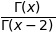

After:


In [48]:
expr = gamma(x)/gamma(x - 2)

func_comparator(expr, simplify)

But 'simplest' form is not well-defined so you don't always get what you want.

In [49]:
expr = x**2 + 2*x + 1

func_comparator(expr, simplify)

Before applying simplify()：


After:


In the example above, may be $(x+1)^2$ is the simplest form for you but simplify() doesn't agree. In theses situations, we can use more specific simplification functions which we will discuss later to better control the return.

Also, simplify() can be slow since it trys all kinds of simplifications before choose the best one. So you already know what simplification you are after, use the more specific function.

### expand()
Given a polymonial, expand() will put it into canonical form of a sum of monomials.

In [50]:
from sympy import expand

expr = (x + 1)**2

func_comparator(expr,expand)

Before applying expand()：


After:


In [51]:
expr = (x + 1)*(x - 2) - (x - 1)*x
func_comparator(expr,expand)

Before applying expand()：


After:


### factor()
factor() factor the expression into irreducible factors over the rational number.

In [52]:
from sympy import factor

expr = (x**2)*z + 4*x*y*z + 4*y**2*z

func_comparator(expr, factor)

Before applying factor()：


After:


### factor_list()
factor_list() does the same simplification with factor() but return a list of irreducible factors.

In [53]:
from sympy import factor_list

expr = x**2*z + 4*x*y*z + 4*y**2*z

func_comparator(expr, factor_list)

Before applying factor_list()：


After:


### collect()
collect() collect the common power of a term in the expression.

In [54]:
from sympy import collect

expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3

func_comparator(expr, collect, x)

Before applying collect()：


After:


### cancel()
cancel() takes any rational function and put it into the canonical form $p/q$, where

* $p$ and $q$ are expanded polymonials which have no common factors
* the leading coefficients of $p$ and $q$ have no denominators

Before applying cancel()：


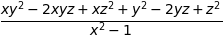

After:


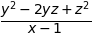

In [55]:
from sympy import cancel

expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
                                                 
func_comparator(expr, cancel)

### apart
apart() performs a partial fraction decomposition over a rational function, which expresses the function with a sum of polymonials and one or several fractions with simplier donominator.

Before applying apart()：


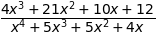

After:


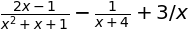

In [56]:
from sympy import apart

expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)

func_comparator(expr, apart)

## Trigonometric simplification

### trigsimp
To simplify expressions with trigonometric identities, use trigsimp(). Much like simplify(), trigsimp() attemps to apply various trigonometric identities to the input expression and user heuristics to choose the 'best' one. 

In [57]:
from sympy import trigsimp

expr = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4

func_comparator(expr, trigsimp)

Before applying trigsimp()：


After:


trigsimp() also works with hyperbolic trig functions.

In [58]:
expr = cosh(x)**2 + sinh(x)**2

func_comparator(expr, trigsimp)

Before applying trigsimp()：


After:


### expand_trig
To expand the trigometric functions, that is, to apply the sum or double angle identities, user expand_trig()

In [59]:
from sympy import expand_trig

expr = sin(x + y)

func_comparator(expr,expand_trig)

Before applying expand_trig()：


After:


## Power simplification

### Assumptions

Before introducing the power simplification functions, a discussion about the identities held by power is in order.

Here we have three kinds of identities

1. $x^ax^b = x^{a + b}$
2. $x^ay^a = (xy)^a$
3. $(x^a)^b = x^{ab}$

Identity 1 is always True.

Identity 2 is not always True. Let's take a counter example for identity 2.

If $x=y=−1$ and $a=1/2$, then $x^ay^a = \sqrt{-1}\sqrt{-1} = i\cdot i = -1$, whereas $x^ay^a = \sqrt{-1}\sqrt{-1} = i\cdot i = -1$.

Identity 3 is not always true either. For example, if $x=−1$, $a=2$, and $b=1/2$, then $(x^a)^b = {\left ((-1)^2\right )}^{1/2} = \sqrt{1} = 1$ and $x^{ab} = (-1)^{2\cdot1/2} = (-1)^1 = -1$

This is important to remember, because by default, sympy will not perform simplification by an identity if it is not True in general.

But if we add additional assumptions, identity 2 and 3 can be always True under these assumptions. 

A set of sufficent conditions for identity 2 can be $x, y \geq 0$ and $a \in \mathbb{R}$ and $b \in \mathbb{Z}$ for identity 3.

In order to make Sympy perform simpilications involving identites that are only True under certain assumptions, we need put assumptions on our symbols. (By default, symbols are assumed to complex.)

We will undertake a more detailed discussion later about assumption system and we just take a simple usage below, which assuming the $x,y$ positive and $a,b$ real.

In [60]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)

Another way to force the simplification take place regardless of the assumptions is to pass ```force = True``` which we will see later.

### powsimp
powsimp() apply identity 1 and 2 from left to right.

In [61]:
from sympy import powsimp
expr = x**a*x**b
func_comparator(expr, powsimp)

Before applying powsimp()：


After:


In [62]:
from sympy import powsimp
expr = x**a*y**a
func_comparator(expr, powsimp)

Before applying powsimp()：


After:


Without necessary assumptions to make identity 2 hold, simplification above doesn't happen.

In [63]:
x, y = symbols('x y')
a, b = symbols('a b')

from sympy import powsimp

expr = x**a*y**a
func_comparator(expr, powsimp)

Before applying powsimp()：


After:


If you know you want to apply this simplification regardless of the assumptions, you can pass ```force=True```

In [64]:
x, y = symbols('x y')
a, b = symbols('a b')

from sympy import powsimp
expr = x**a*y**a
func_comparator(expr, powsimp,force=True)

Before applying powsimp()：


After:


### expand_power_exp
expand_power_exp() applys identity 1 from right to left.

In [65]:
from sympy import expand_power_exp
expr = x**(a + b)
func_comparator(expr, expand_power_exp)

Before applying expand_power_exp()：


After:


### expand_power_base
expand_power_base() applys identity 2 from right to left.

In [66]:
from sympy import expand_power_base
expr = (x*y)**a
func_comparator(expr, expand_power_base)

Before applying expand_power_base()：


After:


### powdenest
powdenest() apply the idenity 3 from left to right.

In [67]:
from sympy import powdenest
expr = (x**a)**b
func_comparator(expr, powdenest,force=True)

Before applying powdenest()：


After:


## Exponentials and logarithms

There are two primary identities for logarithms.

1. $\log{(xy)} = \log{(x)} + \log{(y)}$
2. $\log{(x^n)} = n\log{(x)}$

They have similiar issues with powers. To make simplification honor the identites, we shoud pass ```force = True``` or put additional assumptions.

One set of sufficient assumptions is 

In [68]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

### expand_log
expand_log() applys identity 1 and 2 from left to right

In [69]:
from sympy import expand_log

expr = log(x*y)

func_comparator(expr,expand_log)

Before applying expand_log()：


After:


In [70]:
from sympy import expand_log

expr = log(x**n)

func_comparator(expr,expand_log)

Before applying expand_log()：


After:


In [71]:
from sympy import expand_log

expr = log(x/y)

func_comparator(expr,expand_log)

Before applying expand_log()：


After:


### logcombine
expand_log() applys identity 1 and 2 from right to left

In [72]:
from sympy import logcombine

expr = log(x) + log(y)

func_comparator(expr, logcombine)

Before applying logcombine()：


After:


In [73]:
from sympy import logcombine

expr = n*log(x)

func_comparator(expr, logcombine)

Before applying logcombine()：


After:


## Combitorial

## combsimp

To simplify combitorial expressions, use combsimp()

Before applying combsimp()：


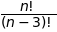

After:


In [74]:
from sympy import combsimp

expr = factorial(n)/factorial(n - 3)

func_comparator(expr, combsimp)

In [75]:
from sympy import combsimp, binomial

n,k = symbols('n k')

expr = binomial(n+1, k+1)/binomial(n, k)

func_comparator(expr, combsimp)

Before applying combsimp()：


After:


# Reference
[Sympy Documentation](http://docs.sympy.org/latest/index.html)

# Related Articles
* [Sympy Notes I]({filename}0026_sympy_intro_1_en.ipynb)
* [Sympy Notes II]({filename}0027_sympy_intro_2_en.ipynb)
* [Sympy Notes III]({filename}0028_sympy_intro_3_en.ipynb)
* [Sympy Notes IV]({filename}0029_sympy_intro_4_en.ipynb)